In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy as sci
import matplotlib
import scikit_posthocs as sci_posthocs

import analysis as ana
import plot as pl

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('display.max_colwidth', None)

In [4]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=False)
font = {#'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}
#mpl.rc('font', **font)

# Loading Data

In [5]:
cog_data, subj_data = ana.load_data('../data')
cog_data_z, subj_data = ana.load_data('../data_zscore')
cog_data_q, subj_data = ana.load_data('../data_quant')

In [7]:
cog_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 1093 to 1047
Columns: 37 entries, sex to acpt01_RT
dtypes: float64(36), int64(1)
memory usage: 67.1 KB


In [11]:
list(cog_data.columns) #37

['sex',
 'interview_age',
 'sestot',
 'mot_edscale',
 'cgi01_gaf2a',
 'cgi01_gaf2b1',
 'cgi01_gaf2b2',
 'cgi01_gaf2c',
 'cogcomp01_nih_fluidcogcomp_unadjusted',
 'cogcomp01_nih_crycogcomp_unadjusted',
 'dccs01_nih_dccs_ageadjusted',
 'deldisk01_auc_200',
 'deldisk01_auc_40000',
 'flanker01_nih_flanker_ageadjusted',
 'lswmt01_tbx_ls',
 'orrt01_read_acss',
 'pcps01_nih_patterncomp_ageadjusted',
 'prang01_anger_ts_nih_toolbox_anger-physical_aggression_ff_age_18+_v2.0',
 'prang01_anger_ts_nih_toolbox_anger-hostility_ff_age_18+_v2.0',
 'prang01_anger_ts_nih_toolbox_anger-affect_cat_age_18+_v2.0',
 'predd01_edd_rs',
 'prsi01_soil_rs',
 'psm01_nih_picseq_ageadjusted',
 'pss01_pss_distress_rs',
 'self_effic01_nih_tlbx_rawscore',
 'tlbx_emsup01_nih_tlbx_rawscore_nih_toolbox_instrumental_support_ff_age_18+_v2.0',
 'tlbx_emsup01_nih_tlbx_rawscore_nih_toolbox_emotional_support_ff_age_18+_v2.0',
 'tlbx_friend01_nih_tlbx_rawscore',
 'tlbx_perhost01_nih_tlbx_rawscore',
 'tlbx_rej01_pr_score',
 'tlbx_

'In good health': 0, 

'Affective psychosis': 1, 

'Non-affective psychosis': 2

# PCA

### cognitive features

In [6]:
pca = PCA()
pca.fit_transform(cog_data_z)
components = pca.components_
cog_data_z_pca = pca.transform(cog_data_z) # project the original data into the PCA space

In [7]:
var = pca.explained_variance_ratio_
cumsum = np.cumsum(var)
np.argmax(cumsum > 0.95)

24

In [8]:
var_p = ana.permutation_test(cog_data_z, 5000)
var_p_mean = np.mean(var_p, axis=0)
t,p = sci.stats.ttest_1samp(var_p, var,alternative='less')
index_significant = np.where(p[:-1] != p[1:])[0][0]
print(sum(var[:index_significant+1]))
p

0.5580488824359419


array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [9]:
print(var[:10])
print(var_p_mean[:10])

[0.24404561 0.1403248  0.06714575 0.0578505  0.04868221 0.03778328
 0.03506985 0.03118648 0.03080175 0.02645033]
[0.05282528 0.04967252 0.04733042 0.04529795 0.04350852 0.04186476
 0.0403337  0.03888435 0.03753514 0.03621756]


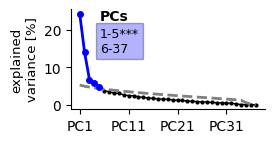

In [16]:
pl.plot_PC(cog_data_z, var, var_p_mean, index_significant)
plt.savefig('fig/PCs_cog.svg', dpi=500, bbox_inches='tight')

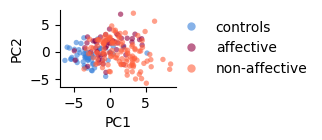

In [15]:
pl.plot_data_2D(cog_data_z_pca)
#plt.savefig('fig/cog_data2D.svg', dpi=500, bbox_inches='tight')
plt.savefig('fig/cog_data2D.svg', dpi=500, bbox_inches='tight')

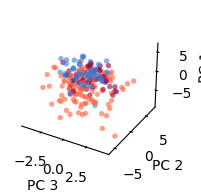

In [33]:
pl.plot_data_3D(cog_data_z_pca)
plt.savefig('fig/cog_data3D.svg', dpi=500, bbox_inches='tight')

In [34]:
cog_components = ana.get_feature_importance(cog_data_z, var, components)

In [35]:
ana.get_highest_contr_feat(cog_components, 'PC1')

Index(['cogcomp01_nih_fluidcogcomp_unadjusted',
       'cogcomp01_nih_crycogcomp_unadjusted', 'wasi201_iqscores_full2iq',
       'tpvt01_tpvt_acss', 'orrt01_read_acss', 'acpt01_%Hits',
       'lswmt01_tbx_ls', 'wasi201_vocab_totalrawscore',
       'wasi201_matrix_totalrawscore', 'dccs01_nih_dccs_ageadjusted'],
      dtype='object')

In [36]:
ana.get_highest_contr_feat(cog_components, 'PC2')

Index(['prsi01_soil_rs', 'pss01_pss_distress_rs', 'tlbx_wellbeing01_tlbxpa_ts',
       'prang01_anger_ts_nih_toolbox_anger-affect_cat_age_18+_v2.0',
       'tlbx_emsup01_nih_tlbx_rawscore_nih_toolbox_emotional_support_ff_age_18+_v2.0',
       'tlbx_friend01_nih_tlbx_rawscore',
       'prang01_anger_ts_nih_toolbox_anger-hostility_ff_age_18+_v2.0',
       'tlbx_rej01_pr_score', 'tlbx_perhost01_nih_tlbx_rawscore',
       'cogcomp01_nih_crycogcomp_unadjusted'],
      dtype='object')

In [37]:
ana.get_highest_contr_feat(cog_components, 'PC3')

Index(['deldisk01_auc_200', 'acpt01_RT', 'deldisk01_auc_40000', 'cgi01_gaf2b1',
       'pcps01_nih_patterncomp_ageadjusted', 'dccs01_nih_dccs_ageadjusted',
       'cogcomp01_nih_fluidcogcomp_unadjusted',
       'flanker01_nih_flanker_ageadjusted', 'cgi01_gaf2c', 'cgi01_gaf2a'],
      dtype='object')

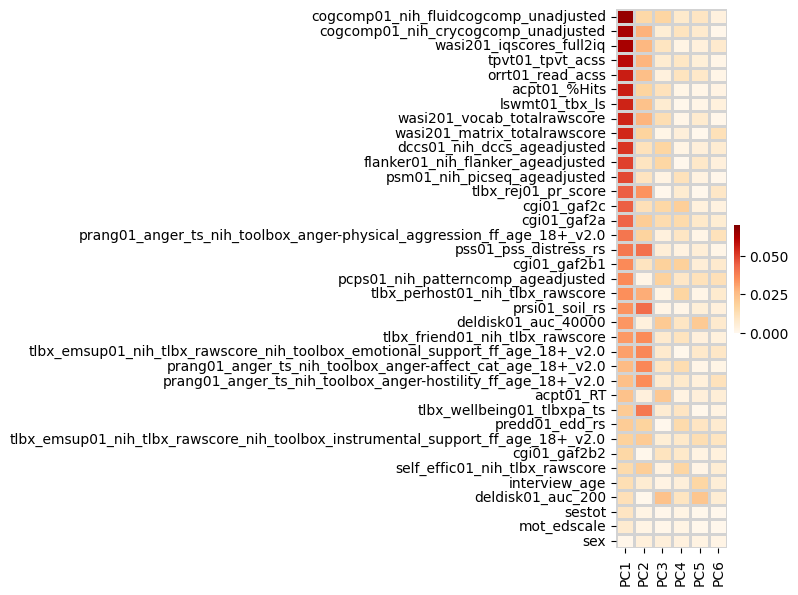

In [38]:
fig = plt.figure(figsize=(1.8,7))
#sns.set(font_scale=0.7)
im = sns.heatmap(cog_components[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']], 
                 cmap='OrRd', cbar_kws={"shrink": 0.2}, annot_kws={"fontsize":2},
                 linewidths=1,linecolor="lightgray", #annot=True,  fmt=".0",
                 vmin=0, vmax=0.07)
plt.savefig('fig/PCs_cog_loadings.svg', dpi=500, bbox_inches='tight')

In [39]:
sns.set(font_scale=0.7)
#sns.set_style(style='white') 

### brain features

In [40]:
pca = PCA()
pca.fit(brain_data_z)
components_brain = pca.components_
brain_data_z_pca = pca.transform(brain_data_z) # project the original data into the PCA space

NameError: name 'brain_data_z' is not defined

In [25]:
var_brain = pca.explained_variance_ratio_
cumsum_brain = np.cumsum(var_brain)
np.argmax(cumsum_brain >= 0.95)

20

In [26]:
var_p_brain = ana.permutation_test(brain_data_z, 5000)
var_p_mean_brain = np.mean(var_p_brain, axis=0)
t,p = sci.stats.ttest_1samp(var_p_brain, var_brain, alternative='less')
index_significant_brain = np.where(p[:-1] != p[1:])[0][0]
print(sum(var_brain[:index_significant_brain+1]))
p

0.5301745046900608


array([0.        , 0.        , 0.        , 0.        , 0.97315714,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [53]:
print(var_brain[:10])
print(var_p_mean_brain[:10])

[0.25963305 0.10506733 0.09195499 0.07351914 0.05068802 0.04544159
 0.04457548 0.03600985 0.03451074 0.02681867]
[0.06424878 0.05964122 0.05622396 0.05333719 0.05073721 0.04835901
 0.04616681 0.04410904 0.04218532 0.04034815]


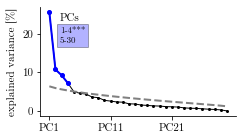

In [104]:
pl.plot_PC(brain_data_z, var_brain, var_p_mean_brain, index_significant_brain)
#plt.savefig('fig/PC_cog.svg', dpi=500, bbox_inches='tight')

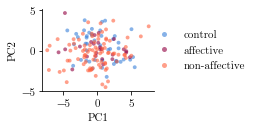

In [54]:
pl.plot_data_2D(brain_data_z_pca)

In [55]:
brain_components = ana.get_feature_importance(brain_data_z, var_brain, components_brain)

In [56]:
ana.get_highest_contr_feat(brain_components, 'PC1')

Index(['3', '4', '5', '29', '16', '26', '8', '1', '17', '30'], dtype='object')

In [57]:
ana.get_highest_contr_feat(brain_components, 'PC2')

Index(['12', '10', '7', '1', '14', '13', '5', '26', '18', '25'], dtype='object')

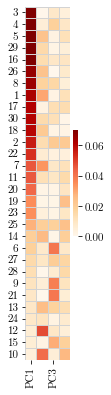

In [58]:
fig = plt.figure(figsize=(1.,6.5))

im = sns.heatmap(brain_components[['PC1', 'PC2', 'PC3', 'PC4']], 
                 cmap='OrRd', cbar_kws={"shrink": 0.3}, linewidths=1,linecolor="lightgray", #annot=True,  fmt=".0",
                 vmin=0, vmax=0.07)
im.set_yticklabels(im.get_yticklabels(), rotation=0)
im.set_xticklabels(im.get_xticklabels(), rotation=90)
plt.show()

### combined features 

In [59]:
data_z_all = cog_data_z.join(brain_data_z)

In [60]:
pca = PCA()
pca.fit_transform(data_z_all)
components_all = pca.components_
data_z_pca = pca.transform(data_z_all) # project the original data into the PCA space

In [61]:
var_all = pca.explained_variance_ratio_
cumsum = np.cumsum(var_all)
np.argmax(cumsum >= 0.95)

42

In [62]:
var_p_all = ana.permutation_test(data_z_all, 5000)
var_p_mean_all = np.mean(var_p_all, axis=0)
t,p = sci.stats.ttest_1samp(var_p_all, var_all, alternative='less')
index_significant_all = np.where(p[:-1] != p[1:])[0][0]
print(sum(var_all[:index_significant_all+1]))
p

0.5753982114357719


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [63]:
print(var_all[:10])
print(var_p_mean_all[:10])

[0.19880619 0.09592147 0.0678582  0.04195749 0.04005064 0.03800533
 0.03371629 0.03196654 0.02711608 0.02565579]
[0.03656786 0.03450841 0.03297913 0.03169434 0.03054197 0.02950695
 0.02853316 0.02762876 0.02676459 0.02594635]


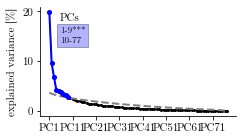

In [64]:
pl.plot_PC(data_z_all, var_all, var_p_mean_all, index_significant_all)
#plt.savefig('fig/PC_cog.svg', dpi=500, bbox_inches='tight')

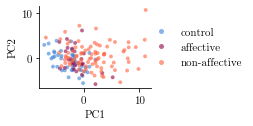

In [65]:
pl.plot_data_2D(data_z_pca)

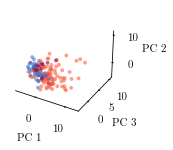

In [66]:
pl.plot_data_3D(cog_data_z_pca)

In [67]:
all_components = ana.get_feature_importance(data_z_all, var_all, components_all)

In [68]:
ana.get_highest_contr_feat(all_components, 'PC1')

Index(['cogcomp01_nih_crycogcomp_unadjusted',
       'cogcomp01_nih_fluidcogcomp_unadjusted', 'acpt01_auditory_t11',
       'wasi201_iqscores_full2iq', 'tpvt01_tpvt_acss', 'acpt01_auditory_t14',
       'orrt01_read_acss', 'lswmt01_tbx_ls', 'wasi201_matrix_totalrawscore',
       'acpt01_auditory_t9'],
      dtype='object')

In [69]:
ana.get_highest_contr_feat(all_components, 'PC2')

Index(['5', '4', '1', '3', '7', '8', 'deldisk01_auc_200', '22',
       'acpt01_auditory_t5', '29'],
      dtype='object')

In [70]:
ana.get_highest_contr_feat(all_components, 'PC3')

Index(['deldisk01_auc_40000', 'deldisk01_sv_10yr_40000',
       'deldisk01_sv_5yr_40000', 'deldisk01_auc_200', 'deldisk01_sv_3yr_40000',
       'deldisk01_sv_6mo_40000', 'deldisk01_sv_1yr_40000',
       'deldisk01_sv_1mo_40000', '3', '8'],
      dtype='object')

In [71]:
ana.get_highest_contr_feat(all_components, 'PC4')

Index(['12', '10', '2', '13', '21', '9', 'interview_age', '4', '26', '1'], dtype='object')

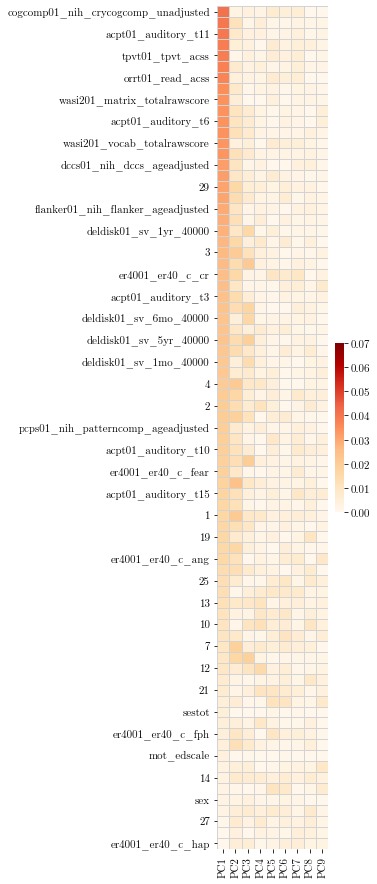

In [72]:
fig = plt.figure(figsize=(2.5,15.5))

im = sns.heatmap(all_components[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']], 
                 cmap='OrRd', cbar_kws={"shrink": 0.2}, linewidths=1,linecolor="lightgray", #annot=True,  fmt=".0",
                 vmin=0, vmax=0.07)